In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib as mpl
import os
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ntpath
import matplotlib as mpl
import glob
import requests
from scipy import stats
import urllib.request
from xml.dom import minidom


In [76]:
path = r'C:\Users\rratnappan\Documents\Confera\Python\Raw_Files'  # or unix / linux / mac path

# Get the files from the path provided in the OP
files = Path(path).glob('*.csv')  # .rglob to get subdirectories

In [77]:
dfs = list()
for i, f in enumerate(files):
    data = pd.read_csv(f)
    data['file'] = f'File {i}'
    dfs.append(data)

df = pd.concat(dfs, ignore_index=True)

In [78]:
df.to_csv('C:\\Users\\rratnappan\\Documents\\Confera\\Python\\Concat.csv')

In [79]:
df1= pd.read_csv('C:\\Users\\rratnappan\\Documents\\Confera\\Python\\Concat.csv')#.set_index('sample_name')

In [80]:
df1['Samples_ID'] = df1['sample_name'] 

In [81]:
df1= df1.set_index('sample_name')

In [82]:
df1['Plate'] = 'PLATE'

In [83]:
#df1.loc[df1[~df1.index.str.contains('PLATE')].index,'Plate'] = df1[~df1.index.str.contains('plate').index.str.split('_').map(lambda x:x[-1])

In [84]:
df1['Source'] = 'PMC'

In [85]:
ss = pd.DataFrame(df1)
ss.to_csv(r'C:\Users\rratnappan\Documents\Confera\\Python\\Concat2.csv')

In [86]:
df1.loc[df1[~df1.index.str.contains('PMC')].index,'Source'] = df1[~df1.index.str.contains('PMC')].index.str.split('_').map(lambda x:x[0])

In [79]:
df1.keys()

Index(['Unnamed: 0', 'region_set_name', 'num_passed_cg_sites',
       'num_cg_sites_unmethylated', 'num_cg_sites_methylated',
       'num_passed_reads', 'num_reads_perfect_unmethylated',
       'num_reads_near_perfect_unmethylated',
       'num_reads_majority_unmethylated', 'num_reads_majority_methylated',
       'num_reads_near_perfect_methylated', 'num_reads_perfect_methylated',
       'amf', 'aumf', 'ccuf_perfect', 'ccuf_near_perfect', 'ccuf_majority',
       'ccmf_majority', 'ccmf_near_perfect', 'ccmf_perfect', 'file',
       'Flow_Cell_ID', 'Samples_ID', 'Source'],
      dtype='object')

In [87]:
df1.loc[df1[~df1.index.str.contains('PLATE')].index,'Plate'] = df1[~df1.index.str.contains('PLATE')].index.str.split('_').map(lambda x:x[-1])

In [88]:
#df1.reset_index(drop=True, inplace=True)
# 

In [89]:
# df1 = df.groupby(['category']).mean()

In [90]:
df1['Precision_Plates'] = df1['Plate']


In [91]:
# ss = pd.DataFrame(df1)
# ss.to_csv(r'C:\Users\rratnappan\Documents\Confera\\Python\\Concat2.csv')

In [92]:
df1.loc[df1[df1['Precision_Plates'].str.contains('Plate1')].index,'Precision_Plates'] = 'Precision-Plates'
df1.loc[df1[df1['Precision_Plates'].str.contains('Plate2')].index,'Precision_Plates'] = 'Precision-Plates'
df1.loc[df1[df1['Precision_Plates'].str.contains('Plate3')].index,'Precision_Plates'] = 'Precision-Plates'
df1.loc[df1[df1['Precision_Plates'].str.contains('Plate4')].index,'Precision_Plates'] = 'Precision-Plates'

In [93]:
# ss = pd.DataFrame(df1)
# ss.to_csv(r'C:\Users\rratnappan\Documents\Confera\\Python\\Concat2.csv')

In [94]:
path = r'C:\Users\rratnappan\Documents\Confera\Python'
sample_TF = pd.read_csv(path + '\Sample_Info.csv')
sample_TF['Source'] = sample_TF['Source'].astype(object)
# sample_TF['Source']

In [95]:
df2=df1.reset_index().merge(sample_TF, on='Source').set_index('sample_name')



In [96]:
#df1 = df1.merge(sample_TF,on='Source',how='right').set_index('Samples_ID')

In [97]:
# ss = pd.DataFrame(df2)
# ss.to_csv(r'C:\Users\rratnappan\Documents\Confera\\Python\\Concat2.csv')

In [98]:
df2.sort_values(by='Sample ID',inplace=True)

In [99]:
df2 = df2[df2['Samples_ID'].str.contains('Neat')]

In [100]:
ss = pd.DataFrame(df2)
ss.to_csv(r'C:\Users\rratnappan\Documents\Confera\\Python\\Concat2.csv')

In [101]:
pts = np.linspace(0, np.pi * 2, 24)
circ = np.c_[np.sin(pts) / 2, -np.cos(pts) / 2]
vert = np.r_[circ, circ[::-1] * .7]
open_circle = mpl.path.Path(vert)


In [102]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

In [107]:
metrics=['AT_Dropout', 'GC_Dropout', 'Mean_Unique_Coverage','Median_Insert_Size','Proper_Pair', 'SD_Methyl_Position_Bias', "Conversion_Eff", 'ccmf_perfect']


In [108]:
x_var='Sample ID'
hue_var='Precision_Plates'

In [109]:
mpl.rc('font', **font)
sns.set(style='darkgrid',context='talk')
title='Confera v1.1'

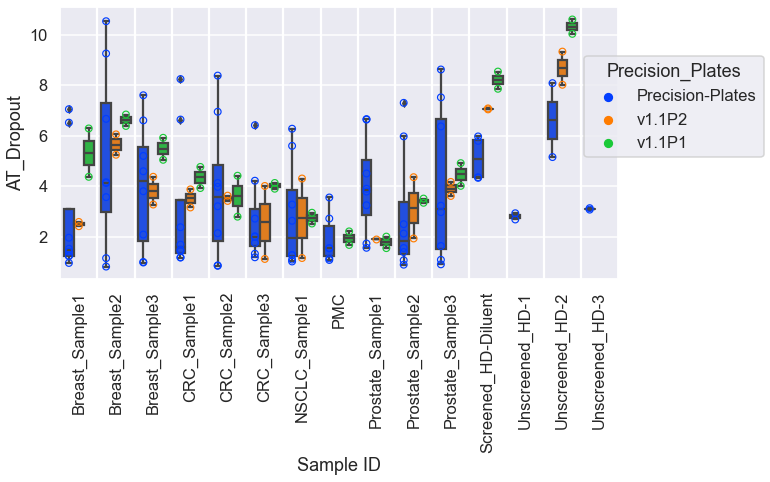

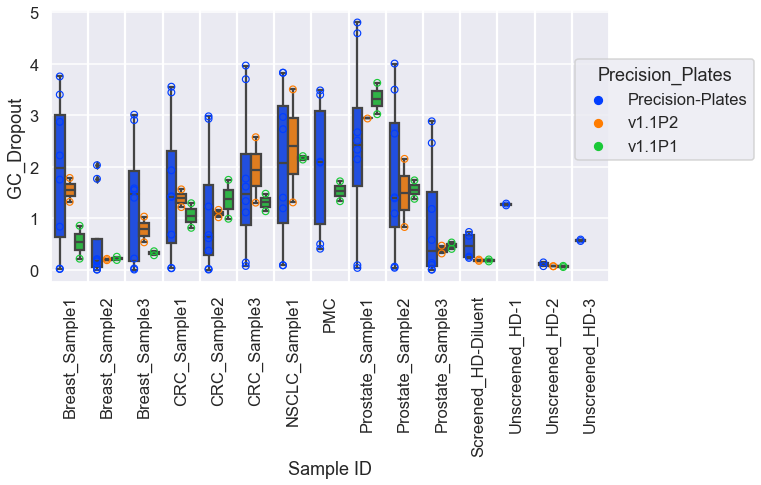

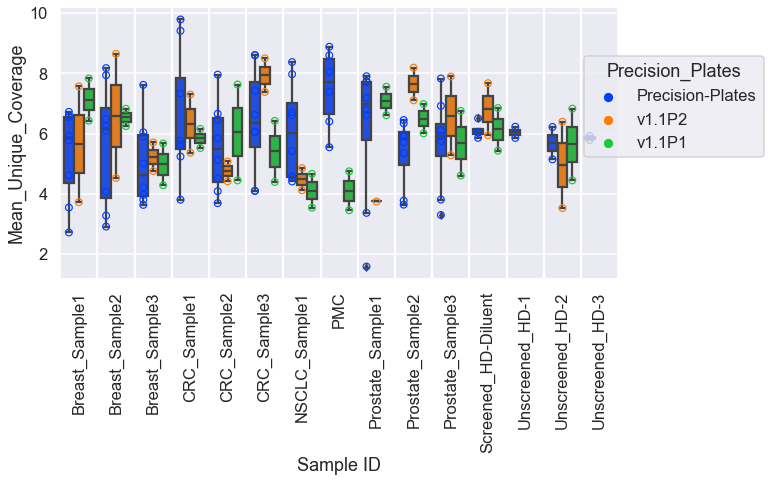

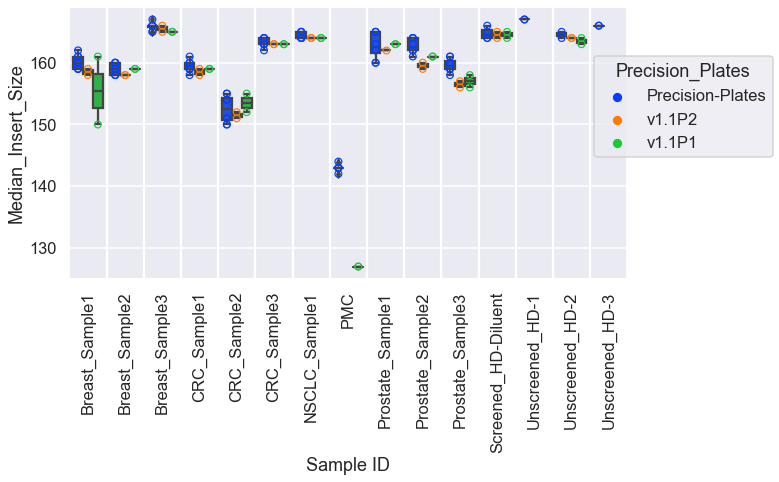

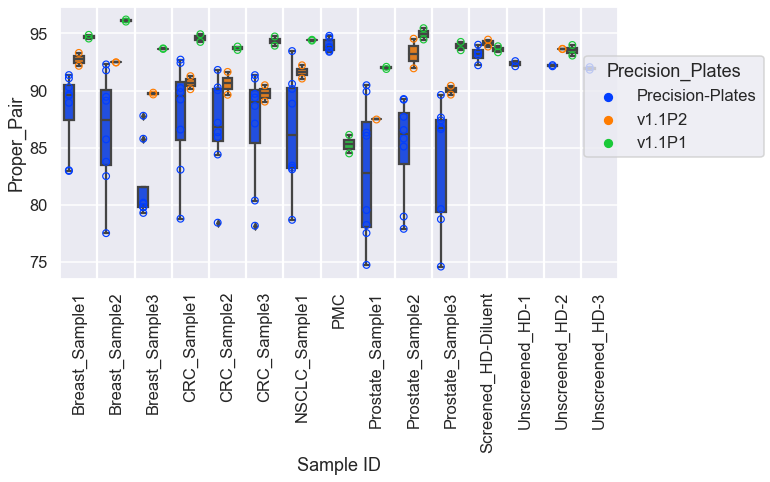

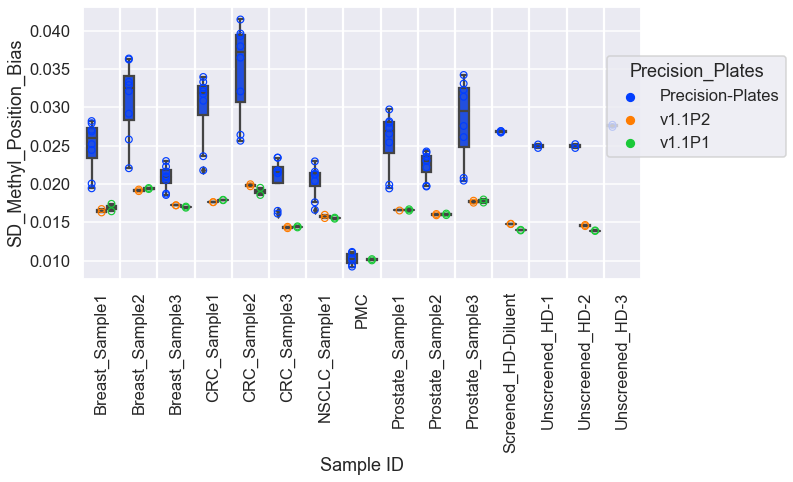

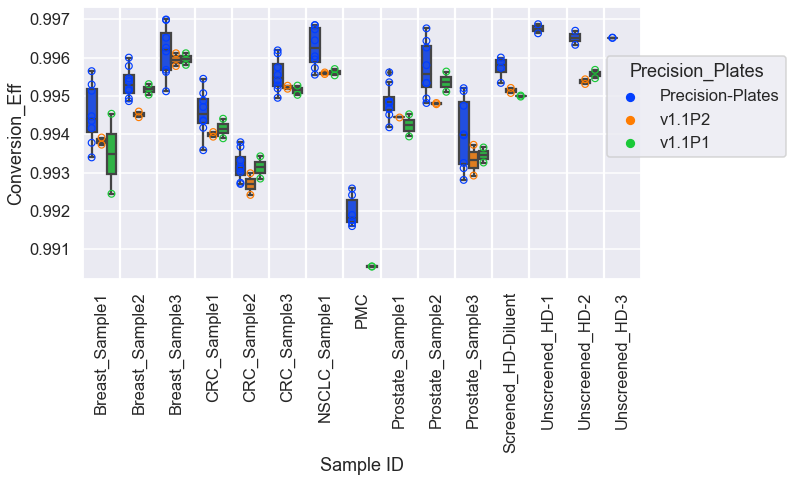

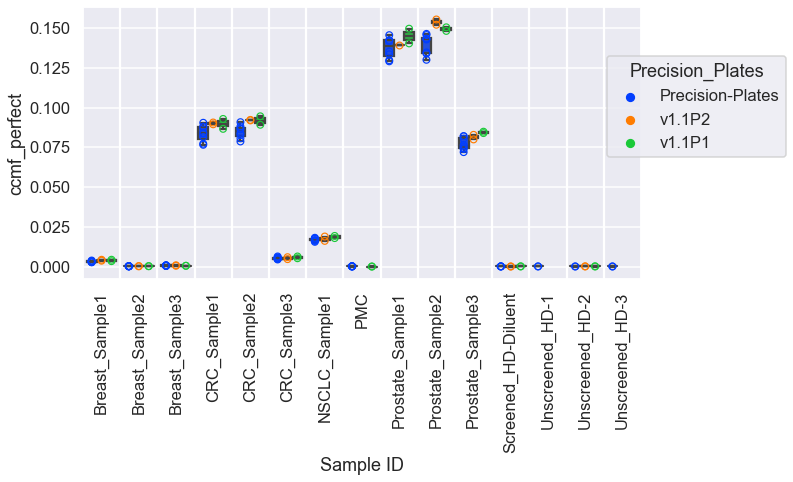

In [110]:
for yvar in metrics[:]:
    tmp = df2[[x_var,hue_var,yvar]]
    # g=sns.FacetGrid(tmp,col='Cycles',size=5,aspect=1)
    axes = plt.figure(figsize=(10,5))
    sns.stripplot(x=x_var,y=yvar,data=tmp,hue=hue_var,dodge=True,palette='bright',jitter=False,size=8,marker=open_circle)#,order=chem_order)
    g = sns.boxplot(x=x_var,y=yvar,hue=hue_var,data=tmp,dodge=True,palette='bright')#,order=chem_order)
    # g.add_legend()
    # g._legend.set_title(hue_var)
    # g.set_axis_labels('',yvar)
    # g.set_xticklabels(rotation=45)
    plt.xticks(rotation=90)
    
     #     if yvar== '85th Percentile Narrow High Exons Redundant Coverage':
    #         ax.axhline(2000, ls='--',color='black')
    xvar_length = int(len(np.unique(tmp[x_var].values.tolist())))
    for var in range(xvar_length - 1):
        plt.axvline(var + 0.5, color="white")
        
    handles, labels = g.get_legend_handles_labels()
    if hue_var!=None:
        g.legend(handles[:int(len(labels)/2)], labels[:int(len(labels)/2)],loc='upper center',bbox_to_anchor= (1.1,0.85),ncol=1,title=hue_var)
#        m.set_xlabel('')
    # plt.savefig(title+'-'+saveName+'.png',dpi=1200,bbox_inches='tight')

    
    # g.savefig(title+'_'+yvar+'.png',dpi=300,bbox_inches='tight')
           
    

In [111]:
df2.sort_values(by='Plate',inplace=True)

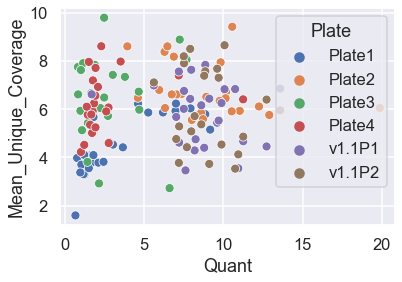

In [112]:
g =sns.scatterplot(x="Quant", y="Mean_Unique_Coverage",
              hue="Plate",
              data=df2);
#g.set(xscale="log");

<AxesSubplot:xlabel='Plate', ylabel='Mapped_Reads'>

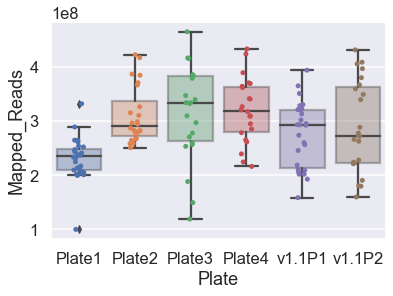

In [113]:
sns.stripplot(x='Plate', y='Mapped_Reads', data=df2, dodge=True)
sns.boxplot(x='Plate', y='Mapped_Reads', data=df2, boxprops={'alpha': 0.4})


<AxesSubplot:xlabel='Plate', ylabel='Mean_Coverage'>

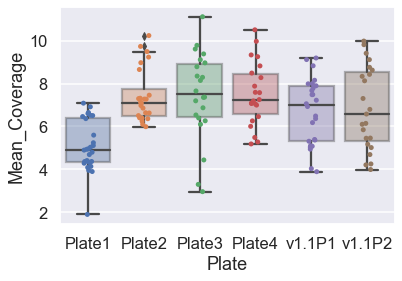

In [114]:
sns.stripplot(x='Plate', y='Mean_Coverage', data=df2, dodge=True)
sns.boxplot(x='Plate', y='Mean_Coverage', data=df2, boxprops={'alpha': 0.4})


In [ ]:
HYPOMETHYLATED FILE

In [65]:
path2 = r'C:\Users\rratnappan\Documents\Confera\Python\Raw_Files\Hypomethylated'  # or unix / linux / mac path

# Get the files from the path provided in the OP
files = Path(path2).glob('*.csv')  # .rglob to get subdirectories

In [66]:
dfs = list()
for i, f in enumerate(files):
    data = pd.read_csv(f)
    data['file'] = f'File {i}'
    dfs.append(data)

df = pd.concat(dfs, ignore_index=True)

In [67]:
df.to_csv('C:\\Users\\rratnappan\\Documents\\Confera\\Python\\HypoConcat.csv')

In [68]:
df1= pd.read_csv('C:\\Users\\rratnappan\\Documents\\Confera\\Python\\HypoConcat.csv')

In [69]:
df1[['sample_name', 'Flow_Cell_ID']] = df1["sample_name"].apply(lambda x: pd.Series(str(x).split(".")))


In [70]:
#df1.Flow_Cell_ID[df1.Flow_Cell_ID==AHGWFMDSX5] = df1.Flow_Cell_ID[df1.Flow_Cell_ID==Plate1]

In [71]:
df1.Flow_Cell_ID = pd.np.where(df1.Flow_Cell_ID == 'AHGWFMDSX5', 'Plate1', df1.Flow_Cell_ID)
df1.Flow_Cell_ID = pd.np.where(df1.Flow_Cell_ID == 'AHHYGFDSX5', 'Plate2', df1.Flow_Cell_ID)
df1.Flow_Cell_ID = pd.np.where(df1.Flow_Cell_ID == 'BHLLF5DSX5', 'Plate3', df1.Flow_Cell_ID)
df1.Flow_Cell_ID = pd.np.where(df1.Flow_Cell_ID == 'BHCHMMDSX5', 'Plate4', df1.Flow_Cell_ID)
df1.Flow_Cell_ID = pd.np.where(df1.Flow_Cell_ID == 'BHJHGLDMXY', 'v1_1_P1', df1.Flow_Cell_ID)
df1.Flow_Cell_ID = pd.np.where(df1.Flow_Cell_ID == 'AHJHCMDMXY', 'v1_1_P2', df1.Flow_Cell_ID)



C:\Users\rratnappan\AppData\Local\Temp\ipykernel_15576\2622343381.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df1.Flow_Cell_ID = pd.np.where(df1.Flow_Cell_ID == 'AHGWFMDSX5', 'Plate1', df1.Flow_Cell_ID)
C:\Users\rratnappan\AppData\Local\Temp\ipykernel_15576\2622343381.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df1.Flow_Cell_ID = pd.np.where(df1.Flow_Cell_ID == 'AHHYGFDSX5', 'Plate2', df1.Flow_Cell_ID)
C:\Users\rratnappan\AppData\Local\Temp\ipykernel_15576\2622343381.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df1.Flow_Cell_ID = pd.np.where(df1.Flow_Cell_ID == 'BHLLF5DSX5', 'Plate3', df1.Flow_Cell_ID)
C:\Users\rratnappan\AppData\Local\Temp\ipykernel_15576\2622343381.py:4: FutureWarning: The pandas

In [72]:
df1['Samples_ID'] = df1['sample_name'] 


In [77]:
df1.to_csv('C:\\Users\\rratnappan\\Documents\\Confera\\Python\\HypoConcat2.csv')

In [75]:
df1= df1.set_index('sample_name')
df1['Source'] = 'PMC'
df1.loc[df1[~df1.index.str.contains('PMC')].index,'Source'] = df1[~df1.index.str.contains('PMC')].index.str.split('_').map(lambda x:x[0])

In [76]:
df1.to_csv('C:\\Users\\rratnappan\\Documents\\Confera\\Python\\HypoConcat12.csv')


In [78]:
df1

,Unnamed: 0,region_set_name,num_passed_cg_sites,num_cg_sites_unmethylated,num_cg_sites_methylated,num_passed_reads,num_reads_perfect_unmethylated,num_reads_near_perfect_unmethylated,num_reads_majority_unmethylated,num_reads_majority_methylated,...,ccuf_perfect,ccuf_near_perfect,ccuf_majority,ccmf_majority,ccmf_near_perfect,ccmf_perfect,file,Flow_Cell_ID,Samples_ID,Source
sample_name,,,,,,,,,,,,,,,,,,,,,
KP656650HD2-01_Rep-1_Plate2,0,hypo_trim_more,38936,3993,34943,8197,33,127,330.0,7867.0,...,0.004026,0.015493,0.040259,0.959741,0.896304,0.675247,File 0,v1_1_P2,KP656650HD2-01_Rep-1_Plate2,KP656650HD2-01
KP656650HD2-01_Rep-2_Plate2,1,hypo_trim_more,22064,2283,19781,4663,13,73,180.0,4483.0,...,0.002788,0.015655,0.038602,0.961398,0.896848,0.664808,File 0,v1_1_P2,KP656650HD2-01_Rep-2_Plate2,KP656650HD2-01
ORD-0908729-01_Neat_Rep-1_Plate2,2,hypo_trim_more,32330,4312,28018,6802,142,298,534.5,6267.5,...,0.020876,0.043811,0.078580,0.921420,0.855484,0.644222,File 0,v1_1_P2,ORD-0908729-01_Neat_Rep-1_Plate2,ORD-0908729-01
ORD-0908729-01_Neat_Rep-2_Plate2,3,hypo_trim_more,28115,3651,24464,5931,95,236,416.5,5514.5,...,0.016018,0.039791,0.070224,0.929776,0.864947,0.641713,File 0,v1_1_P2,ORD-0908729-01_Neat_Rep-2_Plate2,ORD-0908729-01
ORD-0946316-01_Neat_Rep-1_Plate2,4,hypo_trim_more,29359,14332,15027,6152,1890,2482,2884.5,3267.5,...,0.307217,0.403446,0.468872,0.531128,0.456762,0.305429,File 0,v1_1_P2,ORD-0946316-01_Neat_Rep-1_Plate2,ORD-0946316-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ScreenedHD_Neat_Rep-2_Plate1,304,hypo_trim_more,42441,4855,37586,8941,53,199,478.5,8462.5,...,0.005928,0.022257,0.053518,0.946482,0.883570,0.648585,File 1,v1_1_P1,ScreenedHD_Neat_Rep-2_Plate1,ScreenedHD
ScreenedHD_Neat_Rep-1_B9,305,hypo_trim_more,34986,5134,29852,7402,157,400,675.0,6727.0,...,0.021210,0.054039,0.091192,0.908808,0.841124,0.617131,File 1,Plate1,ScreenedHD_Neat_Rep-1_B9,ScreenedHD
ScreenedHD_Neat_Rep-1_G4_Plate2,306,hypo_trim_more,34055,4773,29282,7197,148,367,629.0,6568.0,...,0.020564,0.050993,0.087398,0.912602,0.848965,0.636237,File 1,Plate2,ScreenedHD_Neat_Rep-1_G4_Plate2,ScreenedHD


In [57]:
path = r'C:\Users\rratnappan\Documents\Confera\Python'
sample_TF = pd.read_csv(path + '\Sample_Info.csv')
sample_TF['Source'] = sample_TF['Source'].astype(object)
# sample_TF['Source']

In [58]:
df2=df1.reset_index().merge(sample_TF, on='Source').set_index('sample_name')


In [59]:
df2['Precision_Plates'] = df2['Flow_Cell_ID']
df2.loc[df2[df2['Precision_Plates'].str.contains('Plate1')].index,'Precision_Plates'] = 'Precision-Plates'
df2.loc[df2[df2['Precision_Plates'].str.contains('Plate2')].index,'Precision_Plates'] = 'Precision-Plates'
df2.loc[df2[df2['Precision_Plates'].str.contains('Plate3')].index,'Precision_Plates'] = 'Precision-Plates'
df2.loc[df2[df2['Precision_Plates'].str.contains('Plate4')].index,'Precision_Plates'] = 'Precision-Plates'

In [60]:
df2.to_csv('C:\\Users\\rratnappan\\Documents\\Confera\\Python\\HypoConcat2.csv')

In [61]:
df2 = df2[df2['Samples_ID'].str.contains('Neat')]


In [62]:
df2.to_csv('C:\\Users\\rratnappan\\Documents\\Confera\\Python\\HypoConcat2.csv')

In [63]:
df2.sort_values(by='Sample ID',inplace=True)

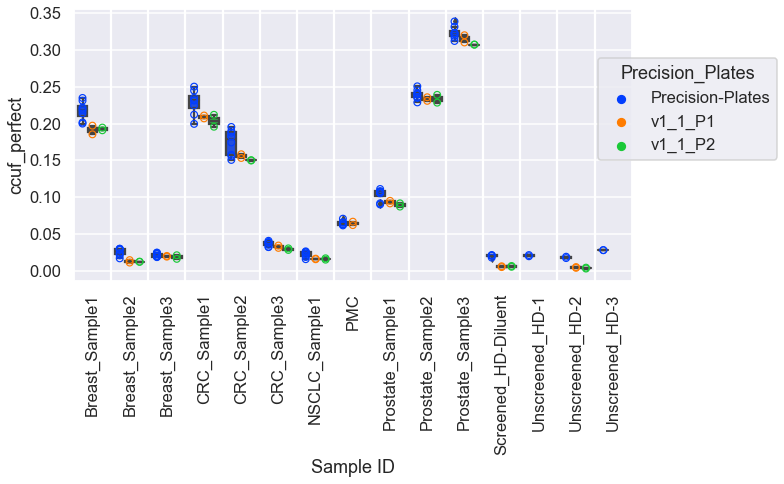

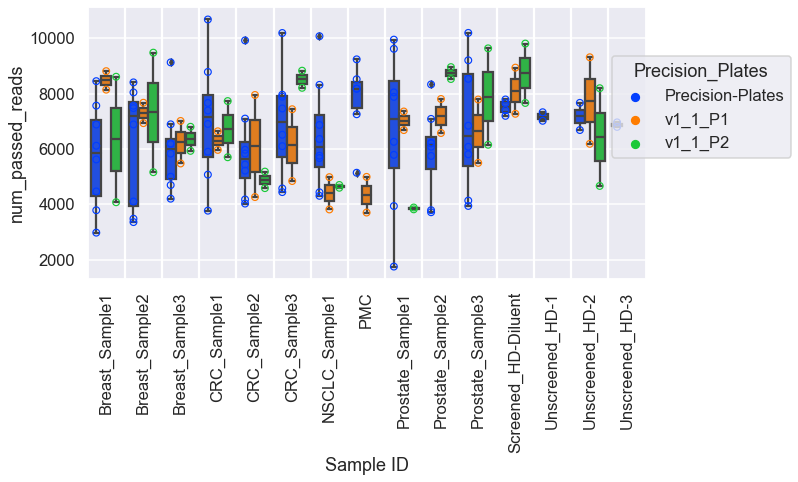

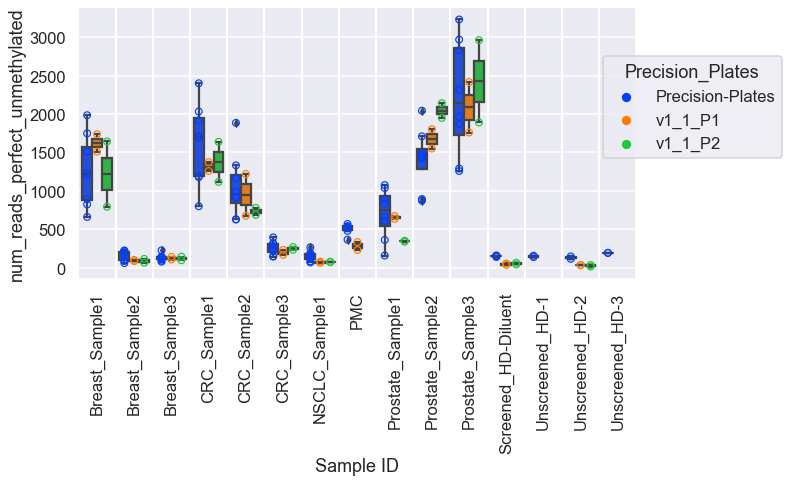

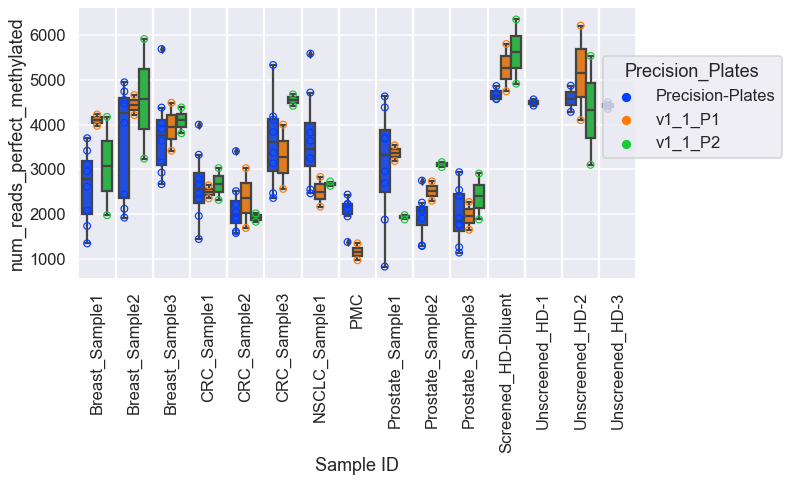

In [64]:
pts = np.linspace(0, np.pi * 2, 24)
circ = np.c_[np.sin(pts) / 2, -np.cos(pts) / 2]
vert = np.r_[circ, circ[::-1] * .7]
open_circle = mpl.path.Path(vert)

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

metrics=['ccuf_perfect', 'num_passed_reads', 'num_reads_perfect_unmethylated','num_reads_perfect_methylated']


x_var='Sample ID'
hue_var='Precision_Plates'

mpl.rc('font', **font)
sns.set(style='darkgrid',context='talk')
title='Confera v1.1'

for yvar in metrics[:]:
    tmp = df2[[x_var,hue_var,yvar]]
    # g=sns.FacetGrid(tmp,col='Cycles',size=5,aspect=1)
    axes = plt.figure(figsize=(10,5))
    sns.stripplot(x=x_var,y=yvar,data=tmp,hue=hue_var,dodge=True,palette='bright',jitter=False,size=8,marker=open_circle)#,order=chem_order)
    g = sns.boxplot(x=x_var,y=yvar,hue=hue_var,data=tmp,dodge=True,palette='bright')#,order=chem_order)
    # g.add_legend()
    # g._legend.set_title(hue_var)
    # g.set_axis_labels('',yvar)
    # g.set_xticklabels(rotation=45)
    plt.xticks(rotation=90)
    
     #     if yvar== '85th Percentile Narrow High Exons Redundant Coverage':
    #         ax.axhline(2000, ls='--',color='black')
    xvar_length = int(len(np.unique(tmp[x_var].values.tolist())))
    for var in range(xvar_length - 1):
        plt.axvline(var + 0.5, color="white")
        
    handles, labels = g.get_legend_handles_labels()
    if hue_var!=None:
        g.legend(handles[:int(len(labels)/2)], labels[:int(len(labels)/2)],loc='upper center',bbox_to_anchor= (1.1,0.85),ncol=1,title=hue_var)
#        m.set_xlabel('')
    # plt.savefig(title+'-'+saveName+'.png',dpi=1200,bbox_inches='tight')

    
    # g.savefig(title+'_'+yvar+'.png',dpi=300,bbox_inches='tight')
           
    